<a href="https://colab.research.google.com/github/mahima110298/ComputerVision/blob/main/Skin_Lesion_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preparation

## Download Training Data

In [1]:
# Download training images and masks (Ground Truth)
!mkdir -p /content/isic2016

!wget -O /content/isic2016/train_input.zip https://isic-archive.s3.amazonaws.com/challenges/2016/ISBI2016_ISIC_Part1_Training_Data.zip
!wget -O /content/isic2016/train_gt.zip https://isic-archive.s3.amazonaws.com/challenges/2016/ISBI2016_ISIC_Part1_Training_GroundTruth.zip


--2025-11-29 20:33:37--  https://isic-archive.s3.amazonaws.com/challenges/2016/ISBI2016_ISIC_Part1_Training_Data.zip
Resolving isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)... 54.231.202.161, 54.231.201.33, 16.15.176.252, ...
Connecting to isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)|54.231.202.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631625308 (602M) [application/zip]
Saving to: ‘/content/isic2016/train_input.zip’

/content/isic2016/t 100%[===================>] 602.36M  17.0MB/s    in 38s     

2025-11-29 20:34:16 (16.0 MB/s) - ‘/content/isic2016/train_input.zip’ saved [631625308/631625308]

--2025-11-29 20:34:16--  https://isic-archive.s3.amazonaws.com/challenges/2016/ISBI2016_ISIC_Part1_Training_GroundTruth.zip
Resolving isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)... 3.5.8.196, 3.5.29.113, 52.216.43.105, ...
Connecting to isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)|3.5.8.196|:44

## Unzip Training Data

In [2]:
# Unzip both images and masks
!unzip -q /content/isic2016/train_input.zip -d /content/isic2016/
!unzip -q /content/isic2016/train_gt.zip -d /content/isic2016/


## Verify Dataset Contents

In [3]:
import os, glob

IMG_DIR = "/content/isic2016/ISBI2016_ISIC_Part1_Training_Data"
MSK_DIR = "/content/isic2016/ISBI2016_ISIC_Part1_Training_GroundTruth"

num_images = len(glob.glob(os.path.join(IMG_DIR, "*.jpg")))
num_masks  = len(glob.glob(os.path.join(MSK_DIR, "*.png")))

print("Number of images:", num_images)
print("Number of masks :", num_masks)

print("\nSample images:", glob.glob(os.path.join(IMG_DIR, '*.jpg'))[:3])
print("Sample masks :", glob.glob(os.path.join(MSK_DIR, '*.png'))[:3])


Number of images: 900
Number of masks : 900

Sample images: ['/content/isic2016/ISBI2016_ISIC_Part1_Training_Data/ISIC_0010852.jpg', '/content/isic2016/ISBI2016_ISIC_Part1_Training_Data/ISIC_0000471.jpg', '/content/isic2016/ISBI2016_ISIC_Part1_Training_Data/ISIC_0008294.jpg']
Sample masks : ['/content/isic2016/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0008913_Segmentation.png', '/content/isic2016/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0000503_Segmentation.png', '/content/isic2016/ISBI2016_ISIC_Part1_Training_GroundTruth/ISIC_0009950_Segmentation.png']


# Subset Creation (500 Images)

## Select 500 Random Images

In [4]:
import numpy as np

# Collect all available images
all_images = sorted(glob.glob(os.path.join(IMG_DIR, "*.jpg")))
print("Total available images:", len(all_images))

# Randomly select 500
np.random.seed(42)
subset_images = list(np.random.choice(all_images, size=500, replace=False))
print("Subset selected:", len(subset_images))


Total available images: 900
Subset selected: 500


## Copy Subset to New Folder

In [5]:
import shutil

SUB_ROOT = "/content/isic2016_subset"
SUB_IMG = os.path.join(SUB_ROOT, "images")
SUB_MSK = os.path.join(SUB_ROOT, "masks")
os.makedirs(SUB_IMG, exist_ok=True)
os.makedirs(SUB_MSK, exist_ok=True)

def mask_path_for(img_path):
    base = os.path.splitext(os.path.basename(img_path))[0]
    return os.path.join(MSK_DIR, f"{base}_Segmentation.png")

# Copy selected pairs
for img_path in subset_images:
    msk_path = mask_path_for(img_path)
    shutil.copy2(img_path, os.path.join(SUB_IMG, os.path.basename(img_path)))
    shutil.copy2(msk_path, os.path.join(SUB_MSK, os.path.basename(msk_path)))

print("Subset images:", len(glob.glob(os.path.join(SUB_IMG, '*.jpg'))))
print("Subset masks :", len(glob.glob(os.path.join(SUB_MSK, '*.png'))))


Subset images: 500
Subset masks : 500


## Quick Preview

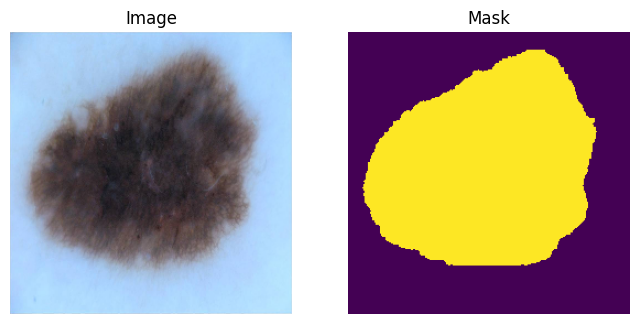

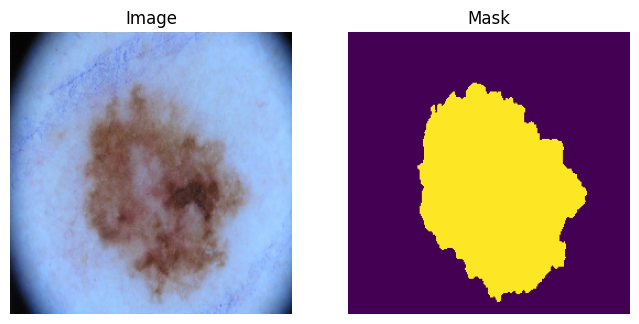

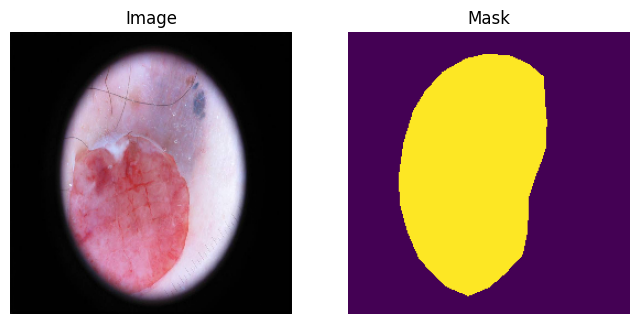

In [6]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

def show_pair(idx=0, size=256):
    imgs = sorted(glob.glob(os.path.join(SUB_IMG, "*.jpg")))
    img_path = imgs[idx]
    base = os.path.splitext(os.path.basename(img_path))[0]
    msk_path = os.path.join(SUB_MSK, f"{base}_Segmentation.png")

    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    msk = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)

    img_disp = cv2.resize(img, (size, size))
    msk_disp = cv2.resize(msk, (size, size), interpolation=cv2.INTER_NEAREST)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1); plt.imshow(img_disp); plt.title("Image"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(msk_disp); plt.title("Mask"); plt.axis("off")
    plt.show()

show_pair(0)
show_pair(1)
show_pair(2)


# Dataset and DataLoader

## Define Custom Dataset Class

In [18]:
from torch.utils.data import Dataset
import cv2
import torch
import numpy as np
import os

class LesionDataset(Dataset):
    """Dataset wrapper for ISIC-style image/mask pairs.
    - img_paths: list of image file paths
    - masks_dir: directory containing mask files named <image>_Segmentation.png
    - transform: albumentations transform (optional)
    - preload: if True, load all items into memory at init
    """
    def __init__(self, img_paths, masks_dir, transform=None, preload=True):
        self.paths = list(img_paths)
        self.masks_dir = masks_dir
        self.transform = transform
        self.preload = preload
        self._store = []

        if self.preload:
            print(f"Preloading {len(self.paths)} samples into RAM...")
            for p in self.paths:
                img, msk = self._load_pair(p)
                self._store.append((img, msk))
            print("Preload finished.")

    def _load_pair(self, image_path):
        base = os.path.splitext(os.path.basename(image_path))[0]
        mask_path = os.path.join(self.masks_dir, f"{base}_Segmentation.png")

        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        image = image.astype("float32") / 255.0

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        # Make sure mask is binary: background 0, lesion 1
        mask = (mask >= 128).astype("float32")

        return image, mask

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        if self.preload:
            img, mask = self._store[idx]
        else:
            img, mask = self._load_pair(self.paths[idx])

        if self.transform:
            # Albumentations expects uint8 for many ops; convert back temporarily
            aug = self.transform(image=(img * 255).astype("uint8"), mask=(mask * 255).astype("uint8"))
            img = aug["image"]
            mask = aug["mask"]

            # Post-process augmented outputs to ensure consistent types
            # Image could be numpy array or torch tensor depending on ToTensorV2
            if isinstance(img, np.ndarray):
                img = img.astype("float32") / 255.0
                img = torch.from_numpy(img.transpose(2, 0, 1)).float()
            elif torch.is_tensor(img):
                img = img.float()
            else:
                # fallback: convert to tensor
                img = torch.tensor(img, dtype=torch.float32)

            # Mask could be numpy array or torch tensor; make it float in {0,1}
            if isinstance(mask, np.ndarray):
                mask = (mask.astype("float32") / 255.0)
                if mask.ndim == 3:
                    # if mask returned with channel dim, squeeze it
                    mask = np.squeeze(mask)
                mask = torch.from_numpy(mask).float()
            elif torch.is_tensor(mask):
                mask = mask.float()
                # if mask in 0..255 range, scale
                if mask.max() > 1.0:
                    mask = mask / 255.0
            else:
                mask = torch.tensor(mask, dtype=torch.float32)

            # Ensure mask has shape [1, H, W]
            if mask.dim() == 2:
                mask = mask.unsqueeze(0)
            elif mask.dim() == 3 and mask.shape[0] != 1:
                # if mask has channels first (C,H,W) and C>1, reduce or take first
                if mask.shape[0] > 1:
                    mask = mask[0:1]
        else:
            # Convert to CHW float tensor in range [0,1]
            img = torch.from_numpy(img.transpose(2, 0, 1)).float()
            mask = torch.from_numpy(mask).unsqueeze(0).float()

        return img, mask

## Create Train/Validation Split

In [19]:
from sklearn.model_selection import train_test_split

all_subset_images = sorted(glob.glob(os.path.join(SUB_IMG, "*.jpg")))

train_imgs, val_imgs = train_test_split(all_subset_images, test_size=0.2, random_state=42)
print("Train size:", len(train_imgs))
print("Val size:", len(val_imgs))


Train size: 400
Val size: 100


## Define Transforms (Albumentations)

In [20]:
!pip install albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_tfms = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Normalize(),
    ToTensorV2()
])

val_tfms = A.Compose([
    A.Resize(256, 256),
    A.Normalize(),
    ToTensorV2()
])

## Create DataLoaders

In [21]:
from torch.utils.data import DataLoader

# Create dataset objects (preload=True caches items in RAM)
train_ds = LesionDataset(train_imgs, SUB_MSK, transform=train_tfms, preload=True)
val_ds   = LesionDataset(val_imgs, SUB_MSK, transform=val_tfms, preload=True)

# DataLoaders (set num_workers=0 for compatibility in notebooks)
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=0)
val_loader = DataLoader(val_ds, batch_size=8, shuffle=False, num_workers=0)

print("Train batches:", len(train_loader))
print("Val batches:", len(val_loader))

Preloading 400 samples into RAM...
Preload finished.
Preloading 100 samples into RAM...
Preload finished.
Train batches: 50
Val batches: 13


## Preview a Batch

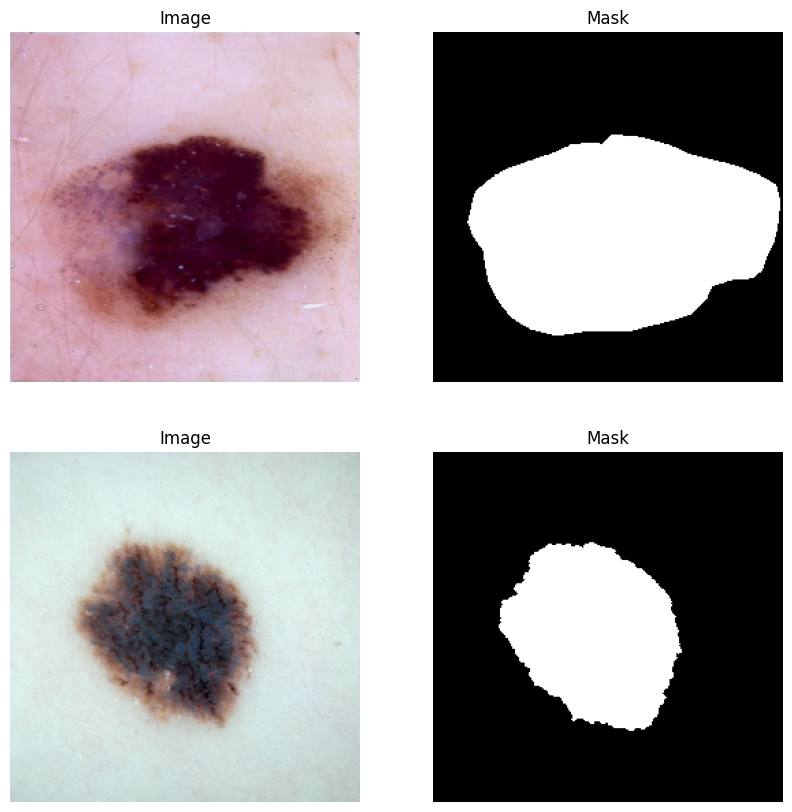

In [22]:
# Visualize One Batch
import matplotlib.pyplot as plt

# Helper function: unnormalize image tensor for visualization
def unnormalize(img_tensor):
    img = img_tensor.numpy().transpose((1,2,0))  # [C,H,W] -> [H,W,C]
    img = (img - img.min()) / (img.max() - img.min())  # scale to [0,1]
    return img

# Take one batch from train loader
try:
    images, masks = next(iter(train_loader))
except RuntimeError as e:
    print("Error loading batch. Try setting num_workers=0 in DataLoader.")
    raise e

plt.figure(figsize=(10,10))
for i in range(2):  # show first 2 samples
    # Unnormalize image for correct visualization
    img = unnormalize(images[i].cpu())
    mask = masks[i].squeeze().cpu().numpy()

    # Show image
    plt.subplot(2,2,2*i+1)
    plt.imshow(img)
    plt.title("Image")
    plt.axis("off")

    # Show mask
    plt.subplot(2,2,2*i+2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask")
    plt.axis("off")

plt.show()



## Visualize One Batch (Train + Validation)

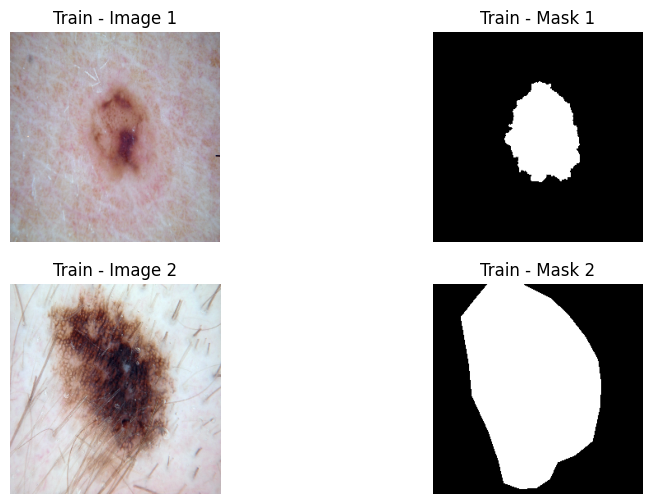

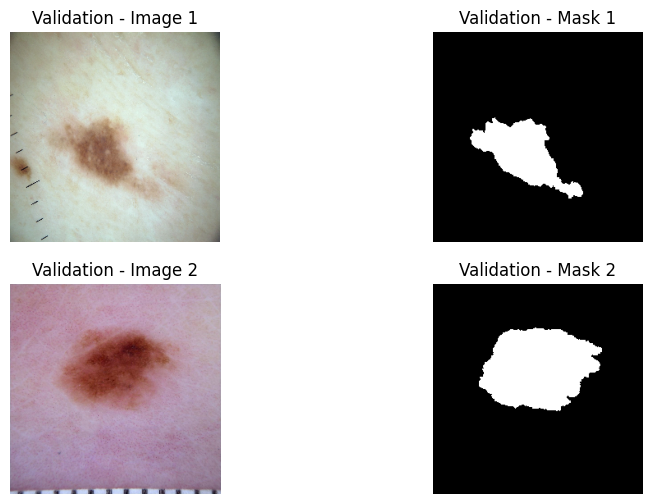

In [23]:
# Visualize batch from train and validation
import matplotlib.pyplot as plt

def visualize_batch(dataloader, title="Batch Samples"):
    images, masks = next(iter(dataloader))

    plt.figure(figsize=(10,6))
    for i in range(2):  # show 2 samples
        img = unnormalize(images[i].cpu())
        mask = masks[i].squeeze().cpu().numpy()

        # Image
        plt.subplot(2,2,2*i+1)
        plt.imshow(img)
        plt.title(f"{title} - Image {i+1}")
        plt.axis("off")

        # Mask
        plt.subplot(2,2,2*i+2)
        plt.imshow(mask, cmap="gray")
        plt.title(f"{title} - Mask {i+1}")
        plt.axis("off")

    plt.show()

# Show train batch
visualize_batch(train_loader, title="Train")

# Show validation batch
visualize_batch(val_loader, title="Validation")


# Define U-Net Model

In [24]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):
    """Two conv layers with ReLU and BatchNorm."""
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(out_ch),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(out_ch),
        )

    def forward(self, x):
        return self.block(x)

class SimpleUNet(nn.Module):
    """A compact U-Net style model for binary segmentation."""
    def __init__(self, in_channels=3, out_channels=1):
        super().__init__()
        self.enc1 = ConvBlock(in_channels, 64)
        self.enc2 = ConvBlock(64, 128)
        self.enc3 = ConvBlock(128, 256)
        self.enc4 = ConvBlock(256, 512)

        self.pool = nn.MaxPool2d(2)

        # bottleneck
        self.bottleneck = ConvBlock(512, 1024)

        # upsampling path: use bilinear upsample + conv blocks
        self.up4 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dec4 = ConvBlock(1024 + 512, 512)

        self.up3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dec3 = ConvBlock(512 + 256, 256)

        self.up2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dec2 = ConvBlock(256 + 128, 128)

        self.up1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dec1 = ConvBlock(128 + 64, 64)

        self.head = nn.Conv2d(64, out_channels, kernel_size=1)
        self.out_act = nn.Sigmoid()

    def forward(self, x):
        x1 = self.enc1(x)
        x2 = self.enc2(self.pool(x1))
        x3 = self.enc3(self.pool(x2))
        x4 = self.enc4(self.pool(x3))

        x_b = self.bottleneck(self.pool(x4))

        u4 = self.up4(x_b)
        u4 = torch.cat([u4, x4], dim=1)
        u4 = self.dec4(u4)

        u3 = self.up3(u4)
        u3 = torch.cat([u3, x3], dim=1)
        u3 = self.dec3(u3)

        u2 = self.up2(u3)
        u2 = torch.cat([u2, x2], dim=1)
        u2 = self.dec2(u2)

        u1 = self.up1(u2)
        u1 = torch.cat([u1, x1], dim=1)
        u1 = self.dec1(u1)

        out = self.head(u1)
        return self.out_act(out)

# Define Loss Function and Optimizer

In [25]:
# Define loss and optimizer (refactored naming)
import torch.optim as optim
import torch.nn as nn

class SoftDiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super().__init__()
        self.smooth = smooth

    def forward(self, predictions, targets):
        preds = predictions.contiguous().view(-1)
        targs = targets.contiguous().view(-1)
        inter = (preds * targs).sum()
        dice_score = (2.0 * inter + self.smooth) / (preds.sum() + targs.sum() + self.smooth)
        return 1.0 - dice_score

# Binary cross-entropy on probabilities
bce_loss = nn.BCELoss()
dice_loss = SoftDiceLoss()

def combined_loss(preds, targets):
    return 0.5 * bce_loss(preds, targets) + 0.5 * dice_loss(preds, targets)

# Device selection (check MPS first, then CUDA, fallback to CPU)
if hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

model = SimpleUNet(in_channels=3, out_channels=1).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
print("Model and optimizer initialized.")

Using device: cuda
Model and optimizer initialized.


# Define Evaluation Metrics

In [26]:
# Consolidated evaluation helpers

def dice_coef(preds, targets, smooth=1.0):
    """Dice coefficient computed on flattened tensors."""
    preds_flat = preds.contiguous().view(-1)
    targets_flat = targets.contiguous().view(-1)
    inter = (preds_flat * targets_flat).sum()
    return (2.0 * inter + smooth) / (preds_flat.sum() + targets_flat.sum() + smooth)


def iou_score(preds, targets, smooth=1.0):
    """Intersection over Union on flattened tensors."""
    preds_flat = preds.contiguous().view(-1)
    targets_flat = targets.contiguous().view(-1)
    inter = (preds_flat * targets_flat).sum()
    union = preds_flat.sum() + targets_flat.sum() - inter
    return (inter + smooth) / (union + smooth)

print('Metric helpers ready.')

Metric helpers ready.


# Training Loop

In [33]:
import time

def fit_model(model, train_loader, val_loader, optimizer, epochs=10, device=device):
    """Train for `epochs` and return history dict with losses and metrics."""
    history = {"train_loss": [], "val_loss": [], "val_dice": [], "val_iou": []}

    print(f"Starting training for {epochs} epochs on {device}.")

    for epoch in range(1, epochs + 1):
        t0 = time.time()
        model.train()
        running_loss = 0.0

        n_batches = len(train_loader)
        for batch_idx, (images, masks) in enumerate(train_loader, start=1):
            # masks are expected to have shape [B, 1, H, W] from the Dataset
            images = images.to(device)
            masks = masks.to(device)

            preds = model(images)
            loss = combined_loss(preds, masks)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if batch_idx == 1 or batch_idx % 10 == 0:
                print(f"  Epoch {epoch} | Batch {batch_idx}/{n_batches} | Loss: {loss.item():.4f}")

        avg_train_loss = running_loss / n_batches

        # Validation
        model.eval()
        val_loss = 0.0
        dice_vals = []
        iou_vals = []

        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(device)
                masks = masks.to(device)
                outputs = model(images)

                val_loss += combined_loss(outputs, masks).item()

                preds_bin = (outputs > 0.5).float()
                dice_vals.append(dice_coef(preds_bin, masks).item())
                iou_vals.append(iou_score(preds_bin, masks).item())

        avg_val_loss = val_loss / len(val_loader)
        avg_dice = sum(dice_vals) / len(dice_vals)
        avg_iou = sum(iou_vals) / len(iou_vals)

        history["train_loss"].append(avg_train_loss)
        history["val_loss"].append(avg_val_loss)
        history["val_dice"].append(avg_dice)
        history["val_iou"].append(avg_iou)

        epoch_time = time.time() - t0
        print("-" * 60)
        print(f"Epoch {epoch} finished in {epoch_time:.2f}s")
        print(f"  Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
        print(f"  Val Dice: {avg_dice:.4f} | Val IoU: {avg_iou:.4f}")

    return history

# Kick off training (adjust epochs if needed)
history = fit_model(model, train_loader, val_loader, optimizer, epochs=20, device=device)

Starting training for 20 epochs on cuda.
  Epoch 1 | Batch 1/50 | Loss: 0.4353
  Epoch 1 | Batch 10/50 | Loss: 0.1236
  Epoch 1 | Batch 20/50 | Loss: 0.3025
  Epoch 1 | Batch 30/50 | Loss: 0.1487
  Epoch 1 | Batch 40/50 | Loss: 0.3316
  Epoch 1 | Batch 50/50 | Loss: 0.2036
------------------------------------------------------------
Epoch 1 finished in 35.48s
  Train Loss: 0.1964 | Val Loss: 0.1868
  Val Dice: 0.8692 | Val IoU: 0.7736
  Epoch 2 | Batch 1/50 | Loss: 0.1720
  Epoch 2 | Batch 10/50 | Loss: 0.1394
  Epoch 2 | Batch 20/50 | Loss: 0.1161
  Epoch 2 | Batch 30/50 | Loss: 0.2115
  Epoch 2 | Batch 40/50 | Loss: 0.2527
  Epoch 2 | Batch 50/50 | Loss: 0.1206
------------------------------------------------------------
Epoch 2 finished in 35.19s
  Train Loss: 0.1743 | Val Loss: 0.1749
  Val Dice: 0.8800 | Val IoU: 0.7880
  Epoch 3 | Batch 1/50 | Loss: 0.1252
  Epoch 3 | Batch 10/50 | Loss: 0.1326
  Epoch 3 | Batch 20/50 | Loss: 0.3112
  Epoch 3 | Batch 30/50 | Loss: 0.1010
  Epoch 

# Training History Graphs

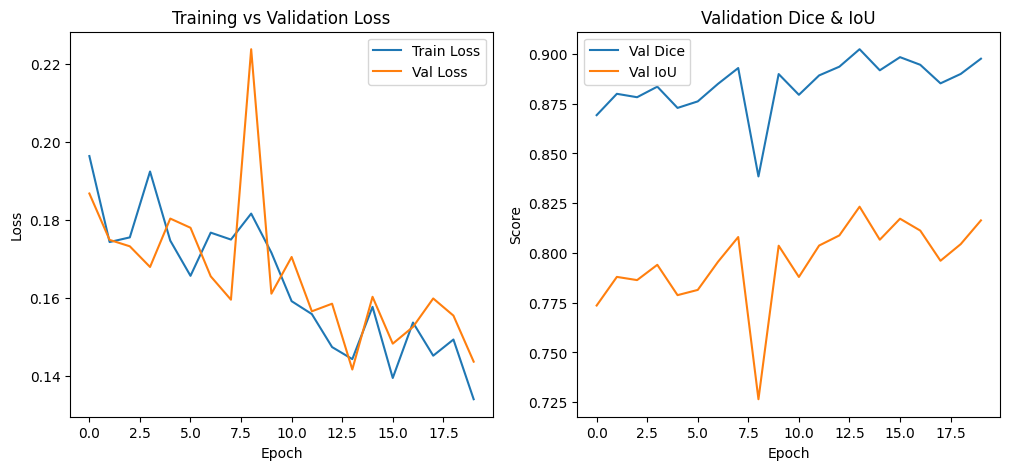

In [34]:
# Training History Graphs


import matplotlib.pyplot as plt

# Plot Loss (Train vs Validation)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot Dice & IoU
plt.subplot(1,2,2)
plt.plot(history["val_dice"], label="Val Dice")
plt.plot(history["val_iou"], label="Val IoU")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Dice & IoU")
plt.legend()

plt.show()


# Precision, Recall, F1 and Confusion Matrix

Validation Precision: 0.9357
Validation Recall: 0.8693
Validation F1-score: 0.9013


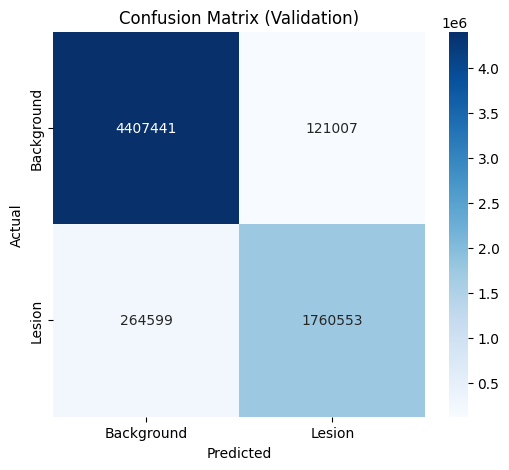

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

# Precision / Recall / F1 implemented with torch operations for clarity

def precision_torch(preds, targets, eps=1e-6):
    p = (preds > 0.5).float().view(-1)
    t = targets.view(-1)
    TP = (p * t).sum()
    FP = (p * (1 - t)).sum()
    return (TP + eps) / (TP + FP + eps)


def recall_torch(preds, targets, eps=1e-6):
    p = (preds > 0.5).float().view(-1)
    t = targets.view(-1)
    TP = (p * t).sum()
    FN = ((1 - p) * t).sum()
    return (TP + eps) / (TP + FN + eps)


def f1_torch(preds, targets, eps=1e-6):
    p = precision_torch(preds, targets, eps)
    r = recall_torch(preds, targets, eps)
    return 2 * (p * r) / (p + r + eps)

# Run evaluation over validation set
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for images, masks in val_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        preds = (outputs > 0.5).float()
        all_preds.append(preds.cpu().numpy().ravel())
        all_targets.append(masks.cpu().numpy().ravel())

all_preds = np.concatenate(all_preds).astype(int)
all_targets = np.concatenate(all_targets).astype(int)

# Compute metrics using torch wrappers (convert arrays back to tensors)
prec = precision_torch(torch.tensor(all_preds), torch.tensor(all_targets)).item()
rec = recall_torch(torch.tensor(all_preds), torch.tensor(all_targets)).item()
f1 = f1_torch(torch.tensor(all_preds), torch.tensor(all_targets)).item()

print(f"Validation Precision: {prec:.4f}")
print(f"Validation Recall: {rec:.4f}")
print(f"Validation F1-score: {f1:.4f}")

# Confusion matrix and heatmap
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Background","Lesion"], yticklabels=["Background","Lesion"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation)")
plt.show()

# Prediction Visualization (Model Predictions vs Ground Truth)

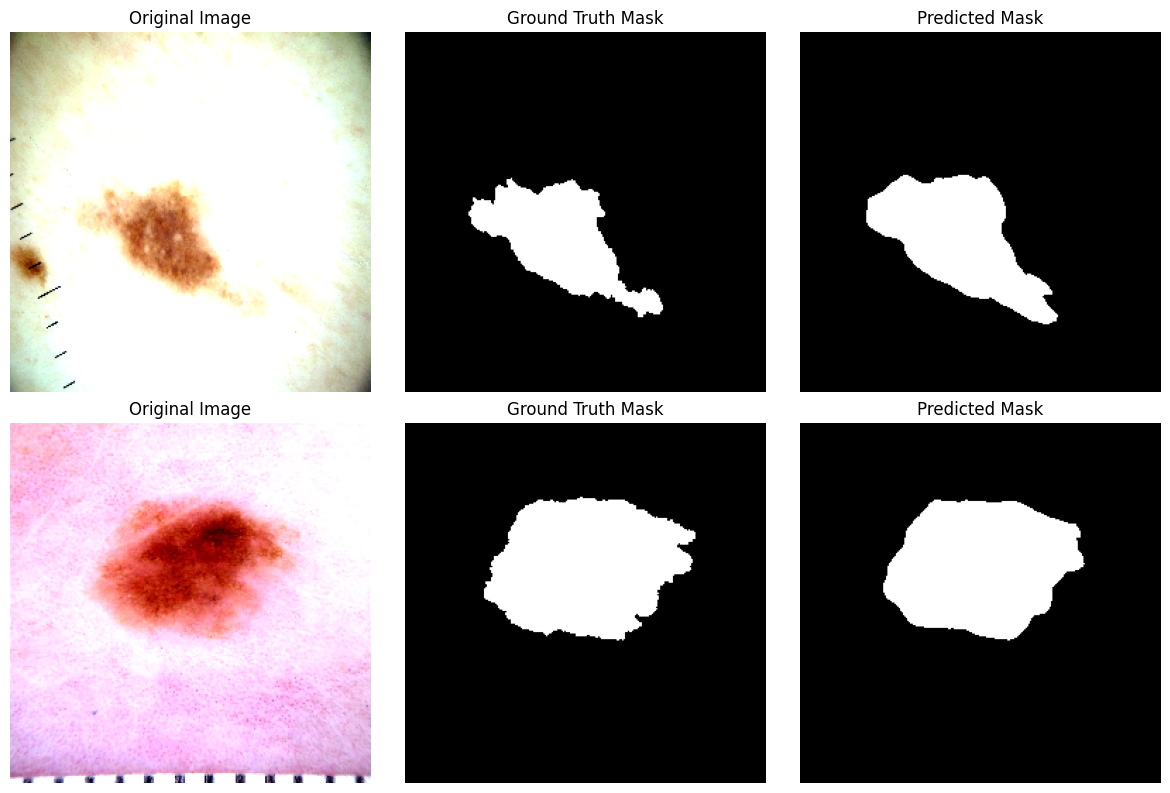

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize images for visualization
def unnormalize(img):
    img = img.cpu().numpy().transpose(1, 2, 0)  # CHW -> HWC
    img = (img * 0.5) + 0.5   # reverse normalization (mean=0.5, std=0.5)
    img = np.clip(img, 0, 1)
    return img

# Show sample predictions
model.eval()
with torch.no_grad():
    images, masks = next(iter(val_loader))
    images, masks = images.to(device), masks.to(device)
    outputs = model(images)
    preds = (outputs > 0.5).float()

    plt.figure(figsize=(12, 8))
    for i in range(2):
        # Original image (unnormalized)
        plt.subplot(2, 3, i*3+1)
        plt.imshow(unnormalize(images[i]))
        plt.title("Original Image")
        plt.axis("off")

        # Ground truth mask
        plt.subplot(2, 3, i*3+2)
        plt.imshow(masks[i].cpu().squeeze(), cmap="gray")
        plt.title("Ground Truth Mask")
        plt.axis("off")

        # Predicted mask
        plt.subplot(2, 3, i*3+3)
        plt.imshow(preds[i].cpu().squeeze(), cmap="gray")
        plt.title("Predicted Mask")
        plt.axis("off")

    plt.tight_layout()
    plt.show()
